### Probabilistic Supervised Learning - Naive Bayes(Binomial): 
Create a dataset from the sample given to you(e.g. “Titanic, Play Tennis Probability”, “Shopper Buying Probability” etc.). Perform the necessary pre-processing steps such as encoding. Train the model using Naive Bayes Classifier for Binomial predictions. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Analyze and write the inference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
data.dropna()
data.drop(columns=['Name'], inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
scaler = StandardScaler()

In [6]:
data['Sex'] = encoder.fit_transform(data['Sex'])
data[['Fare', 'Age']] = scaler.fit_transform(data[['Fare', 'Age']])
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412
2,1,3,0,-0.245958,0,0,-0.490020
3,1,1,0,0.391709,1,0,0.417948
4,0,3,1,0.391709,0,0,-0.487507


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

inps = data.drop(columns=['Survived'])

xTrain, xTest, yTrain, yTest = train_test_split(inps, data['Survived'], random_state=0, test_size=0.2)

In [10]:
nb = GaussianNB()
nb.fit(xTrain, yTrain)
nb.classes_

array([0, 1])

In [11]:
yPred = nb.predict(xTest)

In [12]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

acc = accuracy_score(yTest, yPred)
f1 = f1_score(yTest, yPred)

print(acc, f1)

0.7752808988764045 0.6825396825396826


In [13]:
print(yTest.shape)
labels = [0,1]
cm = confusion_matrix(yPred, yTest, labels=labels)

(178,)


In [14]:
xTest

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
14,3,0,-1.096181,0,0,-0.491443
158,3,1,-1.733848,8,2,0.748575
762,1,1,1.171080,0,0,0.146613
740,3,1,0.108301,0,0,-0.490020
482,3,0,-1.521293,3,1,-0.137451
...,...,...,...,...,...,...
834,3,1,0.179153,0,0,0.486200
672,3,1,-0.812774,0,0,-0.493034
181,3,1,-1.450441,4,2,-0.018449
631,3,0,-1.450441,3,2,-0.088544


<Axes: >

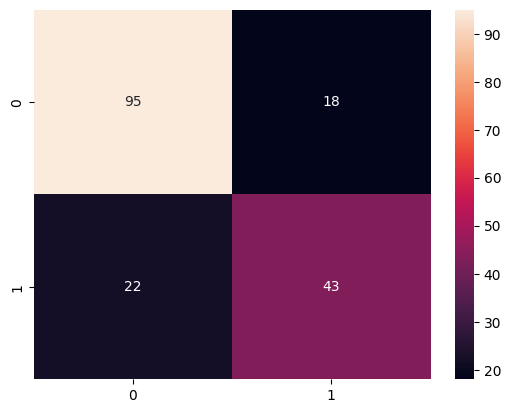

In [15]:
sns.heatmap(cm, annot=True, fmt='g')

In [16]:
from sklearn.metrics import roc_curve, auc
prob = nb.predict_proba(xTest)
prob=prob[:, 1]

<Axes: >

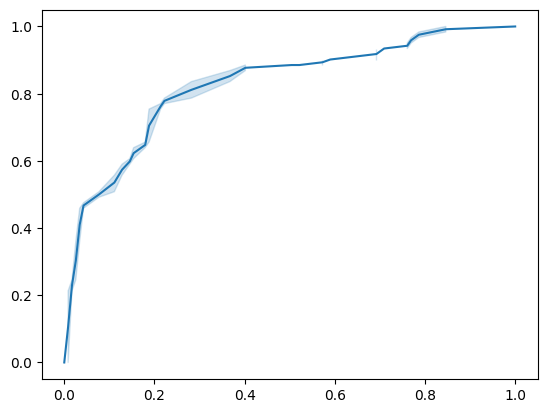

In [17]:
fpr, tpr, _ = roc_curve(yTest, prob)
sns.lineplot(x=fpr, y=tpr)